<a href="https://colab.research.google.com/github/radicalcoder/ML-Project/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import os
import random
import matplotlib
import matplotlib.pyplot as plt
import skimage
import skimage.data
import skimage.transform
from skimage import io
from skimage import color
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
import numpy as np
import pandas as pd
import itertools
import keras
from keras.models import Sequential
from keras import models
from keras.preprocessing import image
from PIL import Image
import PIL
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

# To read the data directory from repository on github.
%matplotlib inline
!git clone -l -s https://github.com/radicalcoder/ML-Project.git data
%cd data
!ls

Cloning into 'data'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 7439 (delta 53), reused 0 (delta 0), pack-reused 7349
Receiving objects: 100% (7439/7439), 254.44 MiB | 14.71 MiB/s, done.
Resolving deltas: 100% (56/56), done.
Checking out files: 100% (7226/7226), done.
/content/data/data
BelgiumTSC_Testing   MLP_final_initialdraft.ipynb  ML_Project.ipynb  traffic.py
BelgiumTSC_Training  MLP.ipynb			   README.md


In [21]:
def data_loader(data_dir):
    """
    The data set is read into two lists, as follows:
    list labels[] -> a list of numbers, where each number represents a unique image label.
    list images[] -> a list of arrays, where each array represents a single image.
    
    The data set directory contains multiple subdirectories. We read all these 
    subdirectories into a list subdirs[]. Since the subfolders are read in a random order, the list
    is also in a random order. We then sort this array using the sort() function.
    """
    
    subdirs = []
    for i in os.listdir(data_dir):
      if os.path.isdir(data_dir + i):   # There may be non image files/directories in the data_dir hence we need to check
        subdirs.append(i)

    #subdirs.sort()
    
    """
    Data is now collected into two lists - labels & images - while looping through the 
    list subdirs[].    
    """

    labels = []
    images = []
    for i in subdirs:
        label_dir = data_dir + i
        #print(label_dir)
        f_names=[]
        for f in os.listdir(label_dir):
          if f.endswith(".ppm"):   # only files that end in .ppm are image files
            f_names.append(label_dir + '/' + f)
        # print(f_names)
        """
        Now for each label, append all its images into the list images[] and 
        append its label number in the list labels[]. 
        """
        
        for f in f_names:
            images.append(skimage.data.imread(f))   #use parameter as_grey??
            labels.append(int(i))
    return labels, images


# Loading the training and testing dataset using the function data_loader().
training_data_dir = "BelgiumTSC_Training/Training/"
testing_data_dir = "BelgiumTSC_Testing/Testing/"

training_labels, training_images = data_loader(training_data_dir)
testing_labels, testing_images = data_loader(testing_data_dir)
print(training_labels)

[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 11, 11, 11, 11, 11, 11, 11, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 22, 22, 22, 22, 22, 22

In [0]:
#Creating an iteration object of tupules (zip) which matches images with their labels per tupule
shuff_train = list(zip(training_images, training_labels))
#Shuffling the image-label pairs in our zip object
random.shuffle(shuff_train)
#Unzipping the images and labels after shuffling is done
training_images, training_labels = zip(*shuff_train)
training_images=list(training_images)
training_labels=list(training_labels)
#Creating an iteration object of tupules (zip) which matches images with their labels per tupule
shuff_test = list(zip(testing_images, testing_labels))
#Shuffling the image-label pairs in our zip object
random.shuffle(shuff_test)
#Unzipping the images and labels after shuffling is done
testing_images, testing_labels = zip(*shuff_test)
testing_images=list(testing_images)
testing_labels=list(testing_labels)

In [23]:
print("No of unique Labels in Training Data: ", len(set(training_labels)), "\nTotal number of Images in Training Data: ", len(training_images)) 
print("No of unique Labels in Testing Data: ", len(set(testing_labels)), "\nTotal number of Images in Testing Data: ", len(testing_images)) 

No of unique Labels in Training Data:  62 
Total number of Images in Training Data:  4575
No of unique Labels in Testing Data:  53 
Total number of Images in Testing Data:  2520


In [0]:
def display_images_and_labels(images, labels):
    #Display the first image of each label.
    unique_labels = set(labels) #Grouping same labels together
    plt.figure(figsize=(15, 15)) #Sets the size of figure which will contain all images displayed to 15x15 inches
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns in the 15x15 inch plot figure created above
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image,cmap="gray")
    plt.show()


(4575, 32, 32, 3)
Grayscale
(32, 32)
(32, 32, 1)


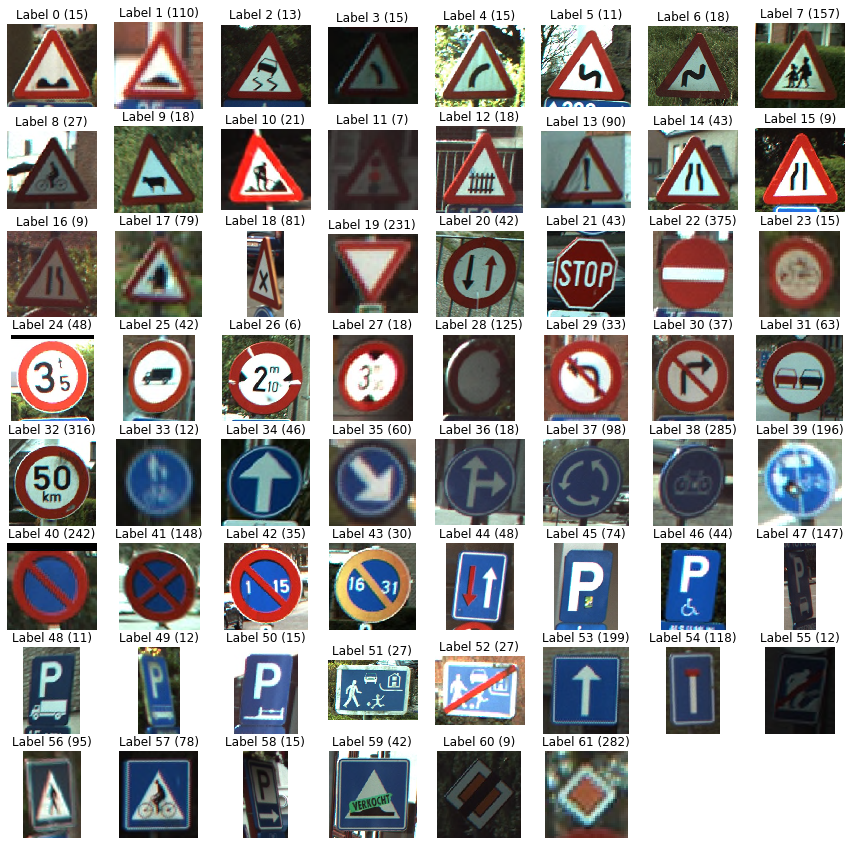

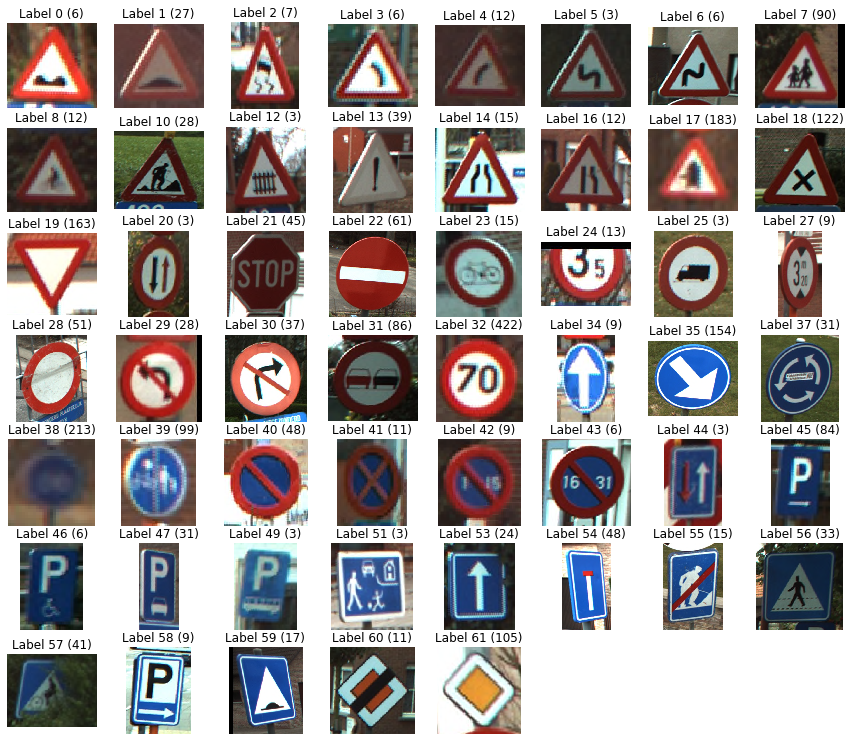

In [25]:
#Training Data

#Reshaping the images to 32x32 px
reshape_images_training=[]

for i in training_images:
  reshape_images_training.append(skimage.transform.resize(i,(32,32), mode ='constant'))

reshape_images_training= np.array(reshape_images_training) #Keras requires our images and labels to be in numpy arrays
print(reshape_images_training.shape)

#Converting RGB reshaped images to grayscale images
grayscale_images_training=[]

for i in reshape_images_training:
  grayscale_images_training.append(color.rgb2gray(i))
  
grayscale_images_training= np.array(grayscale_images_training)  #Keras requires our images and labels to be in numpy arrays

print("Grayscale")
print(grayscale_images_training[0].shape)

image_expanded_training = grayscale_images_training[:, :, :, np.newaxis]  #converting images from 32x32 to 32x32x1 
grayscale_images_training=image_expanded_training

print(grayscale_images_training[0].shape)

display_images_and_labels(training_images,training_labels)
display_images_and_labels(testing_images, testing_labels)

In [26]:
#Testing Data
#Reshaping the images to 32x32 px
reshape_images_testing=[]

for i in testing_images:
  reshape_images_testing.append(skimage.transform.resize(i,(32,32), mode ='constant'))

reshape_images_testing= np.array(reshape_images_testing) #Keras requires our images and labels to be in numpy arrays
print(reshape_images_testing.shape)

#Converting RGB reshaped images to grayscale images
grayscale_images_testing=[]
for i in reshape_images_testing:
  grayscale_images_testing.append(color.rgb2gray(i))
  
grayscale_images_testing= np.array(grayscale_images_testing) #Keras requires our images and labels to be in numpy arrays

print("Grayscale")
print(grayscale_images_testing[0].shape)

image_expanded_testing = grayscale_images_testing[:, :, :, np.newaxis]  #converting imags from 32x32 to 32x32x1
grayscale_images_testing=image_expanded_testing

print(grayscale_images_testing[0].shape)

#display_images_and_labels(testing_images,testing_labels)
#display_images_and_labels(grayscale_images_testing, testing_labels)

(2520, 32, 32, 3)
Grayscale
(32, 32)
(32, 32, 1)


In [27]:
from keras.utils import to_categorical
#print(training_labels)
labels_train = to_categorical(training_labels) #one-hot encode training label column
labels_test = to_categorical(testing_labels) #one-hot encode testing label column
print(labels_train.shape)
print("\n")
print(type(labels_train))
print(training_labels[500])
print(labels_train[500])

#print(testing_labels)
print(labels_test.shape)
print("\n")
print(type(labels_test))
print(testing_labels[500])
print(labels_test[500])

(4575, 62)


<class 'numpy.ndarray'>
10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(2520, 62)


<class 'numpy.ndarray'>
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#Constructing the CNN Model

model_gen = Sequential() #The Sequential model is a linear stack of layers.
# Conv2D - Applies 32 convolution filters of size 3x3 each.
model_gen.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=grayscale_images_training[0].shape))  #When using this layer as the first layer in a model, we provide the keyword argument "input_shape"
#model_gen.add(Conv2D(32, (3, 3), activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25)) #To help prevent overfitting
 
model_gen.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu')) # Applies 64 convolution filters of size 3x3 each.
#model_gen.add(Conv2D(64, (3, 3), activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25)) #To help prevent overfitting
 
model_gen.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu')) # Applies 128 convolution filters of size 3x3 each.
#model_gen.add(Conv2D(64, (3, 3), activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25)) #To help prevent overfitting
 
model_gen.add(Flatten())
model_gen.add(Dense(512, activation='relu'))
model_gen.add(Dropout(0.5))                  
model_gen.add(Dense(512, activation='relu'))
model_gen.add(Dropout(0.5))
model_gen.add(Dense(62, activation='softmax'))

In [0]:
"""
Adagrad is an optimizer with parameter-specific learning rates, 
which are adapted relative to how frequently a parameter gets 
updated during training. The more updates a parameter receives, 
the smaller the learning rate.
"""
model_gen.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
#Linking Gdrive to save models

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Creating checkpoint to store only the best model based on validation accuracy
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/ML-Proj/Best_Weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [42]:
from keras.preprocessing.image import ImageDataGenerator

# we can use image augmentation
# basically it needs to redifine for normal actual scores like 0.9 of accuracy and more
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=False,
    rotation_range=12,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

datagen.fit(grayscale_images_training)

#Training the CNN model
%time
epochs=50
batch_size = 20
history_generator = model_gen.fit_generator(datagen.flow(grayscale_images_training, labels_train, batch_size=batch_size),
                    epochs=epochs, steps_per_epoch=500 , callbacks=callbacks_list, verbose=1,
                    validation_data=(grayscale_images_testing, labels_test))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
Epoch 1/50
500/500 [==============================] - 8s 16ms/step - loss: 0.3223 - acc: 0.8919 - val_loss: 0.5435 - val_acc: 0.8460

Epoch 00001: val_acc improved from -inf to 0.84603, saving model to /content/drive/My Drive/ML-Proj/Best_Weights.hdf5
Epoch 2/50
500/500 [==============================] - 8s 15ms/step - loss: 0.3261 - acc: 0.8903 - val_loss: 0.4919 - val_acc: 0.8591

Epoch 00002: val_acc improved from 0.84603 to 0.85913, saving model to /content/drive/My Drive/ML-Proj/Best_Weights.hdf5
Epoch 3/50
500/500 [==============================] - 8s 16ms/step - loss: 0.3176 - acc: 0.8938 - val_loss: 0.4199 - val_acc: 0.8750

Epoch 00003: val_acc improved from 0.85913 to 0.87500, saving model to /content/drive/My Drive/ML-Proj/Best_Weights.hdf5
Epoch 4/50
500/500 [==============================] - 8s 16ms/step - loss: 0.3231 - acc: 0.8931 - val_loss: 0.4492 - val_acc: 0.8730

Epoch 00004: val_acc did not improve fro

In [0]:
#Loading Best Weights
model_gen.load_weights("/content/drive/My Drive/ML-Proj/Best_Weights.hdf5")
#Saving Best Model
model_gen.save("/content/drive/My Drive/ML-Proj/Best_Model.h5")

In [44]:
#Predicting Traffic Signs
test_predictions = model_gen.predict_classes(grayscale_images_testing, batch_size=batch_size, verbose =1)
print(test_predictions.shape)
print(type(test_predictions))
pred_value=6
print(test_predictions[pred_value])
print(testing_labels[pred_value])

2520/2520 [==============================] - 0s 146us/step
(2520,)
<class 'numpy.ndarray'>
28
28


In [45]:
scores = model_gen.evaluate(grayscale_images_testing, labels_test)
print(scores[0])    #Loss
print(scores[1])    #Accuracy

2520/2520 [==============================] - 0s 121us/step
0.44969194834194487
0.8801587303479512


In [0]:
   
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
#Citation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix for 62 Sample classes'
        
    fig = plt.figure(figsize=(20,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):
    plot_history(history_generator) #For a binary report (sigmoid output) instead of the multiclass report, set binary .parameter to True

In [47]:
print(type(labels_test))
print(labels_test.shape)
print(type(test_predictions))
print(test_predictions[0])

<class 'numpy.ndarray'>
(2520, 62)
<class 'numpy.ndarray'>
22


2520
22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


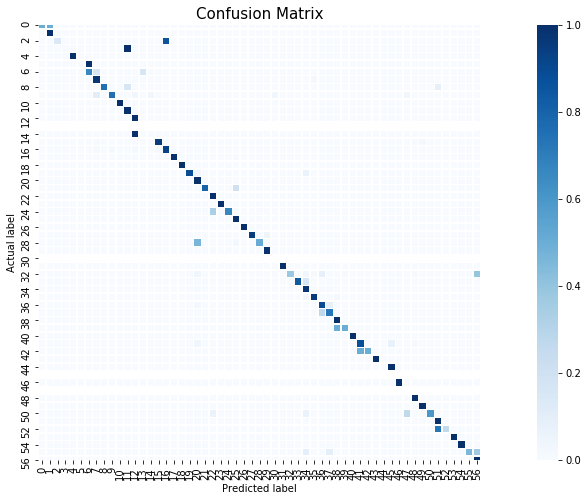

In [48]:
classes = list(range(0,62))
y=[]
y_pred = []

for i in range(labels_test.shape[0]):

  for j in range(len(classes)):

    if(labels_test[i][j]==1):
      y.append(j)
      #print(y)


print(len(y))
print(y[0])

#Confusion Matrix for testing data
cm_test = confusion_matrix(y, test_predictions)
cm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]  #To nomalize the confusion matrix

d_cm_test=np.diagonal(cm_test)
acc_score_test = accuracy_score(y, test_predictions)

import seaborn as sns
f = plt.figure(figsize=(20,8))
ax=f.add_subplot(1,1,1)
sns.heatmap(cm_test, annot=False, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues',ax=ax, vmin=0, vmax=1)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
'Accuracy Score: {0}'.format(acc_score_test)
ax.set_title('Confusion Matrix', size = 15);
plt.show()